**The Task**

 Here, we aim to conduct a classification task on our dataset. The objective is to correctly categorize the given messages into one of the two categories: 'user' or 'assistant'.

To achieve this, I will be employing several models to evaluate their performance on the task:

Logistic Regression: A statistical model used for predicting the probability of occurrence of an event. It's simple yet effective for binary classification tasks.

Neural Network: A set of algorithms, modeled loosely after the human brain, designed to recognize patterns. Suitable for complex data.

Random Forest: An ensemble learning method, which creates a 'forest' of decision trees and outputs the mode of the classes.

Extra Trees Classifier: Like a Random Forest, but it uses the whole dataset to train each tree and uses random thresholds for splitting test conditions.


For data splitting, I will be splitting the data separately for each model to avoid any unexcpected results or misprocessing of the data.


**Model Selection**

Commented codes will be provided separately for each model used.
For the mathematical underpinnings of each model:

**1- The logisitc regression model**:
We'll be using it as it perfroms binary classification. It estimates the probability $P(Y=1|X)$ given a set of indepenedent variable X.
The equation for it is:

  $P(Y=1|X) = 1/(1+e^-(B0+B1X))$

where
- $P(Y=1|X)$ is the probability of class 1 given input X
- $B0$ is the intercept
- $B1$ are the coefficients of the input features
e is the base of natural logarithms.

The output is a probability that the given input point belongs to class 1. It then converts this probability to a binary outcome via a threshold (e.g., 0.5).
For Loss function, I'll be using cross entropy loss as it's the one used for most logistic regrssion model and it's built in in the library.
The mathematical formula for it is
$$L(Y,P) = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(p_i) + (1-y_i) \log(1-p_i) \right]$$

where
- N is the number of observations
- yi is the true label
- pi is the predicted probability of the input to be in class 1.

**2- Neural network**:
Here, we'll be converting the message into a sequence of integers via vectorization, then we feed them into the embedding layer that transofrms each integer into a dense vector.

Preprocessing and Text Tokenization:
Textual data is tokenized, which means it is converted into a sequence of integers. Each unique word is mapped to a unique integer. If the text data has a wide range of unique words, we limit it to a set number (MAX_WORDS here).

Post-tokenization, sequences can vary in length. Thus, sequences are padded (or truncated) to ensure a consistent length (MAX_LEN).

Embedding Layer:
This layer transforms each token (integer) into a dense vector of fixed size (embedding_dim), capturing the semantic meaning of the words. These vectors are learned as the model trains.

Flatten Layer:
After the embedding layer, the output is a 2D tensor. This layer reshapes the 2D tensor into a 1D tensor, preparing it for the dense layer.

Dense Layers:
The flattened vector is passed through one or more dense layers (also known as fully connected layers).
In my model, The first dense layer has 32 units and uses the Rectified Linear Unit (ReLU) activation function.
The final dense layer has as many units as there are unique senders, and it uses the softmax activation function to predict the sender of a message. Each unit in this layer outputs the probability that the message belongs to a particular sender.

Loss Function:
The model uses the sparse_categorical_crossentropy loss, suitable for multi-class classification where labels are integers. The loss function measures the difference between the predicted probabilities and the true classes and updates the model weights accordingly during training.
Given:
- $C$: Number of classes
- $y$ : True class as an integer in $[0, C-1]$
- $\hat{y}$ : Vector of predicted probabilities of length $ C$ , outputted from a softmax layer in the neural network. Let's denote the probability of the $ i^{th}$  class as $\hat{y}_i$ .

The loss for one data point using the sparse categorical cross-entropy is:
$$L(y, \hat{y}) = -\log(\hat{y}_y)$$
Here, $\hat{y}_y$  denotes the predicted probability corresponding to the true class.

For a batch of $N$  data points, the loss is averaged over all the data points:
L = $-\frac{1}{N} \sum_{n=1}^{N}\log(\hat{y}^n_y) $
Where:
- $\hat{y}^n$ is the vector of predicted probabilities for the $n^{th}$  data point.

- $y$  is the true class for the $n^{th}$  data point.

**Note that** in this model I'm using the defalut value of the Adam optimizer learning rate which is 0.001.

**3-Random Forest**:

 This model creates multiple decision trees during training and combines their outputs for a more accurate and robust prediction. Each tree gives a "vote" for a class label, and the RF algorithm predicts the class with the most votes.

Text Preprocessing:
Tokenization: The text is converted into individual tokens (words or terms) using the nltk.word_tokenize method.
Stopwords Removal: Common words like 'and', 'is', 'the' that don't offer significant insights into the content's meaning are removed. These words are termed as stopwords.
Lemmatization: Words are reduced to their base or dictionary form. For example, 'running' becomes 'run', and 'mice' becomes 'mouse'. This process helps in reducing the dimensionality of the data.
Feature Extraction - TF-IDF Vectorization:
we studied this vectorizer in class before and it converts the text data into numerical form. It not only considers the frequency of a word in a particular document (Term Frequency) but also how unique a word is to the entire dataset (Inverse Document Frequency). This ensures that frequent words across documents don't dominate the ones that are unique to a particular document.

Random Forest Classifier:
Given the transformed feature matrix, the RF algorithm is trained. Each tree in the RF is trained on a bootstrap sample of the data, and at each node, a random subset of features is chosen to decide the best split. This randomness helps the RF to generalize better and not overfit.

n_estimators: It specifies the number of trees in the forest.
random_state: Ensures reproducibility of the results.

Loss Function:
The loss in RF is impurity-based. At each node of the tree, the algorithm selects the split that results in the maximum reduction in impurity (Gini impurity or entropy).

$\text{Gini}(S) = 1 - \sum_{i=1}^{C} p_i^2 \$

Where:
- $S$ is the set of samples.
- $C$ is the number of classes.
-  $p_i$ is the proportion of samples of class $i$ in $S$.

For each feature, the Gini impurity is calculated, and the feature that results in the lowest Gini impurity is chosen for the split.


**4- Extra tree classifier**:
It is a tree-based ensemble learning method similar to the Random Forest. However, there are two main differences:

While Random Forest uses bootstrapped samples of the data (sampling with replacement), Extra Trees uses the whole dataset when forming trees.
Moreover, In Random Forest, splits at each node are determined by evaluating a subset of features and picking the best split based on an impurity measure. In contrast, Extra Trees uses random splits for node partitions. This randomness increases the bias but decreases the variance, often leading to better generalization on unseen data.

Messages in the dataset are either classified as originating from 'ChatGPT' or a 'Human'. The provided code filters messages to only those that are at least 10 words long. Then, messages from 'ChatGPT' are further split into paraphrased versions and each paraphrase is also filtered for a minimum length of 10 words. The final dataset contains the unique 'text' as the independent variable and 'category' as the dependent variable, either 'ChatGPT' or 'Human'.

Feature Extraction: Here, I used TF-IDF Vectorization as in previous models.


After preprocessing and feature extraction, the Extra Trees Classifier is applied.


Loss Function:
Similar to Random Forest, the ETC's loss is impurity-based. At each node of the tree, the algorithm aims to select the split that results in the maximum reduction in impurity (Gini impurity or entropy).


The Gini impurity formula for Extra Trees is:

$\text{Gini}(S) = 1 - \sum_{i=1}^{C} p_i^2$

**Data conversion code**

In [ ]:
import json
import pandas as pd

# Load the JSON file of your data
with open('your directory here', 'r') as json_file:
    data = json.load(json_file)



df = pd.DataFrame(data)

# Save to CSV
df.to_csv('your_chat_file.csv', index=False)

# Read the CSV file
df_from_csv = pd.read_csv('your_chat_file.csv')

# Display the first few rows of the DataFrame
print(df_from_csv.head())

#Save to a new CSV file
df_from_csv.to_csv('saving directory', index=False)



In [ ]:
import csv
import sys

csv_file_path = "your directory here"

# Increase the maximum field size limit
maxInt = sys.maxsize
csv.field_size_limit(maxInt)

# Read the CSV file and update the 'mapping' column
rows = []
with open(csv_file_path, 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        mapping_content = row['mapping']
        # Replace single quotes with double quotes
        mapping_content = mapping_content.replace("'", '"')
        row['mapping'] = mapping_content
        rows.append(row)

# Save the updated rows back to the CSV file
with open(csv_file_path, 'w', newline='') as csvfile:
    fieldnames = reader.fieldnames
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    # Write the header
    writer.writeheader()

    # Write the updated rows
    writer.writerows(rows)

print("Conversion complete.")


In [ ]:
import re
import pandas as pd

def extract_messages_from_csv(file_path):
    # Load CSV file into DataFrame
    df = pd.read_csv(file_path)

    # Define a pattern to extract messages
    message_pattern = re.compile(r'"parts": \[\s*"([^"]*)"\s*\]')

    # Extract messages using the pattern
    messages = []
    for mapping in df['mapping']:
        matches = message_pattern.findall(mapping)

        # Append non-empty messages to the list
        for match in matches:
            if match.strip():
                messages.append(match)
                print(match)

    return messages




#if name == "__main__":
file_path = 'your directory here'
messages = extract_messages_from_csv(file_path)
if messages is not None:
    print("Extracted messages:")
    for msg in messages:
        print(msg)

In [ ]:
import re
import pandas as pd

def extract_messages_from_csv(file_path, output_path):
    # Load CSV file into DataFrame
    df = pd.read_csv(file_path)

    # Define patterns to extract messages and senders
    message_pattern = re.compile(r'"parts": \[\s*"([^"]*)"\s*\]')
    sender_pattern = re.compile(r'"role":\s*"([^"]*)"')

    # Extract messages and senders using the patterns
    messages_with_senders = []
    for mapping in df['mapping']:
        matches_msg = message_pattern.findall(mapping)
        matches_sender = sender_pattern.findall(mapping)

            ## Append non-empty messages and their senders to the list
        for i, match in enumerate(matches_msg):
            if match.strip():
                sender = matches_sender[i] if i < len(matches_sender) else None
                # Check if sender is 'user' or 'assistant'
                if sender in ["user", "assistant"]:
                    messages_with_senders.append((sender, match))
                    print(f"Sender: {sender}\nMessage: {match}\n")

    # Convert the list of tuples into a DataFrame
    df_output = pd.DataFrame(messages_with_senders, columns=['Sender', 'Message'])

    # Save the new DataFrame to the specified output CSV file
    df_output.to_csv(output_path, index=False)

    return df_output

# Call the function with the desired file paths
extract_messages_from_csv('your directory here', 'your directory here' )


**Neural Network Model**

In [ ]:
!pip install gdown


In [97]:
import gdown
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Download the file from Google Drive
url = 'https://drive.google.com/uc?id=1Xpjl_z7NtkBqEeLkuSjS9uKtn0XKepU8'
output = 'chats_file.csv'
gdown.download(url, output, quiet=False)

# Load data
data = pd.read_csv('chats_file.csv')

# Select the longest 200 messages from each sender
selected_data = []
unique_senders = data['Sender'].unique()

for sender in unique_senders:
    sender_data = data[data['Sender'] == sender]
    selected_messages = sender_data.iloc[sender_data['Message'].str.len().argsort()[-200:]].copy()
    selected_data.append(selected_messages)

selected_data_df = pd.concat(selected_data)

messages = selected_data_df['Message'].values
senders = selected_data_df['Sender'].values

# Tokenize and pad sequences
MAX_WORDS = 10000
MAX_LEN = 50
tokenizer = Tokenizer(num_words=MAX_WORDS)
tokenizer.fit_on_texts(messages)
sequences = tokenizer.texts_to_sequences(messages)
X_data = pad_sequences(sequences, maxlen=MAX_LEN)

# Encode senders to integers
encoder = LabelEncoder()
y_data = encoder.fit_transform(senders)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

# Neural Network Model
embedding_dim = 50
model = Sequential()
model.add(Embedding(input_dim=MAX_WORDS, output_dim=embedding_dim, input_length=MAX_LEN))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(len(encoder.classes_), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Compute metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

# Print metrics
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")


Downloading...
From: https://drive.google.com/uc?id=1Xpjl_z7NtkBqEeLkuSjS9uKtn0XKepU8
To: /content/chats_file.csv
100%|██████████| 1.87M/1.87M [00:00<00:00, 53.9MB/s]


Epoch 1/10
8/8 [==============================] - 2s 42ms/step - loss: 0.6918 - accuracy: 0.4648 - val_loss: 0.6917 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 0s 18ms/step - loss: 0.6279 - accuracy: 0.9844 - val_loss: 0.6904 - val_accuracy: 0.4531
Epoch 3/10
8/8 [==============================] - 0s 18ms/step - loss: 0.5634 - accuracy: 0.9961 - val_loss: 0.6896 - val_accuracy: 0.4375
Epoch 4/10
8/8 [==============================] - 0s 19ms/step - loss: 0.4660 - accuracy: 0.9961 - val_loss: 0.6872 - val_accuracy: 0.4531
Epoch 5/10
8/8 [==============================] - 0s 22ms/step - loss: 0.3265 - accuracy: 0.9961 - val_loss: 0.6901 - val_accuracy: 0.4688
Epoch 6/10
8/8 [==============================] - 0s 14ms/step - loss: 0.1789 - accuracy: 0.9961 - val_loss: 0.6976 - val_accuracy: 0.4688
Epoch 7/10
8/8 [==============================] - 0s 16ms/step - loss: 0.0815 - accuracy: 0.9961 - val_loss: 0.7117 - val_accuracy: 0.5000
Epoch 8/10
8/8 [===========


My Training Accuracy is Rising:

In the beginning (epoch 1), my model got its predictions right roughly 46% of the time (accuracy: 0.4805).
By the 10th epoch, the training accuracy reached nearly 98.8% (accuracy: 0.98), meaning the model had gotten really good at predicting the training data.
Validation Accuracy is Unstable and Low:

My validation accuracy started at 50% in the first epoch.
However, by the 10th epoch, it was 51%. This suggests that while my model is performing well on the training data, it's struggling to generalize to new data it hasn't seen before.
Loss Values :

The training loss (a measure of error) decreased over time, which is a good sign. It means my model is getting better at its predictions on the training data.
However, the validation loss increased from the 5th epoch onward, indicating the model's predictions on new data were getting worse.
Final Test Performance:

After training, I tested my model on a separate test dataset. It achieved an accuracy of 46.25%. This means that on completely new data, the model was correct less than half the time.
Also, it got 45.97% F1 score, 47.48% preceisoin, and 46.2% recall.
From these results, I can see that my model is overfitting. This means it's learning the training data almost perfectly but struggles with new, unseen data. I might need to consider changes to improve its ability to generalize.

**Extra Tree Classifier**

In [67]:
url = 'your directory here'
output = 'chats_file.csv'
gdown.download(url, output, quiet=False)

# Load data
df = pd.read_csv('chats_file.csv')
print(df)
print(df.shape)

Downloading...
From: https://drive.google.com/uc?id=1Xpjl_z7NtkBqEeLkuSjS9uKtn0XKepU8
To: /content/chats_file.csv
100%|██████████| 1.87M/1.87M [00:00<00:00, 136MB/s]

         Sender                                            Message
0     assistant  explain these: Techniques like TF-IDF (Term Fr...
1          user  X_test, y_train, y_test = train_test_split(X, ...
2     assistant  I need a python code to extract the content se...
3          user  generalize the code for any snippet like the o...
4     assistant                                    message content
...         ...                                                ...
3531  assistant  explain the intuition and the process of how t...
3532       user  The thresholds for compressing an image are ch...
3533       user  Consider the set of vectors S = {v1, v2, ...vn...
3534  assistant  \n\nTo determine whether S is linearly indepen...
3535       user      provide sagemath code as a supporting example

[3536 rows x 2 columns]
(3536, 2)


In [68]:
category = {}
for i in range(len(data)):
    sender = data.iloc[i]['Sender']

    # If the sender is not ChatGPT, then label it as 'human'
    if sender != 'assistant':
        category[data.iloc[i]['Message']] = 'human'
    else:
        paraphrases = data.iloc[i]['Message'][1:-1].split(', ')
        for paraphrase in paraphrases[:1]:
            category[paraphrase[1:-1]] = 'chatgpt'


In [77]:
category = {}

for i in range(len(data)):
    message = data.iloc[i]['Message']
    sender = data.iloc[i]['Sender']
    word_count = len(message.split())

    # Only process messages that are at least 10 words long
    if word_count >= 10:
        # If the sender is not ChatGPT, then label it as 'human'
        if sender != 'assistant':
            category[message] = 'human'
        else:

            category[message] = 'chatgpt'


In [ ]:
df=pd.DataFrame(category.items(),columns=["text","category"])
df=df.sample(frac=1)
df=df[:20000]
df

In [ ]:
df["category"].value_counts()


In [80]:
X=df['text']
y=df['category']

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
#testing multiple models to select best one
lg = LogisticRegression(penalty='l1',solver='liblinear')
sv = SVC(kernel='sigmoid',gamma=1.0)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
knn = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bg = BaggingClassifier(n_estimators=50,random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [84]:
def prediction(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    pr = model.predict(X_test)
    acc_score = metrics.accuracy_score(y_test,pr)
    f1= metrics.f1_score(y_test,pr,average="binary", pos_label="chatgpt")
    return acc_score,f1

acc_score = {}
f1_score={}
clfs= {
    'LR':lg,
    'SVM':sv,
    'DTC':dtc,
    'KNN':knn,
    'RFC':rfc,
    'ETC':etc,
    'ABC':abc,
    'BG':bg,
    'GBC':gbc,
}
for name,clf in clfs.items():
    acc_score[name],f1_score[name]= prediction(clf,X_train_tfidf,X_test_tfidf,y_train,y_test)

    #View those scores
    acc_score
    f1_score


[[102 122]
 [103 145]]


<Axes: >

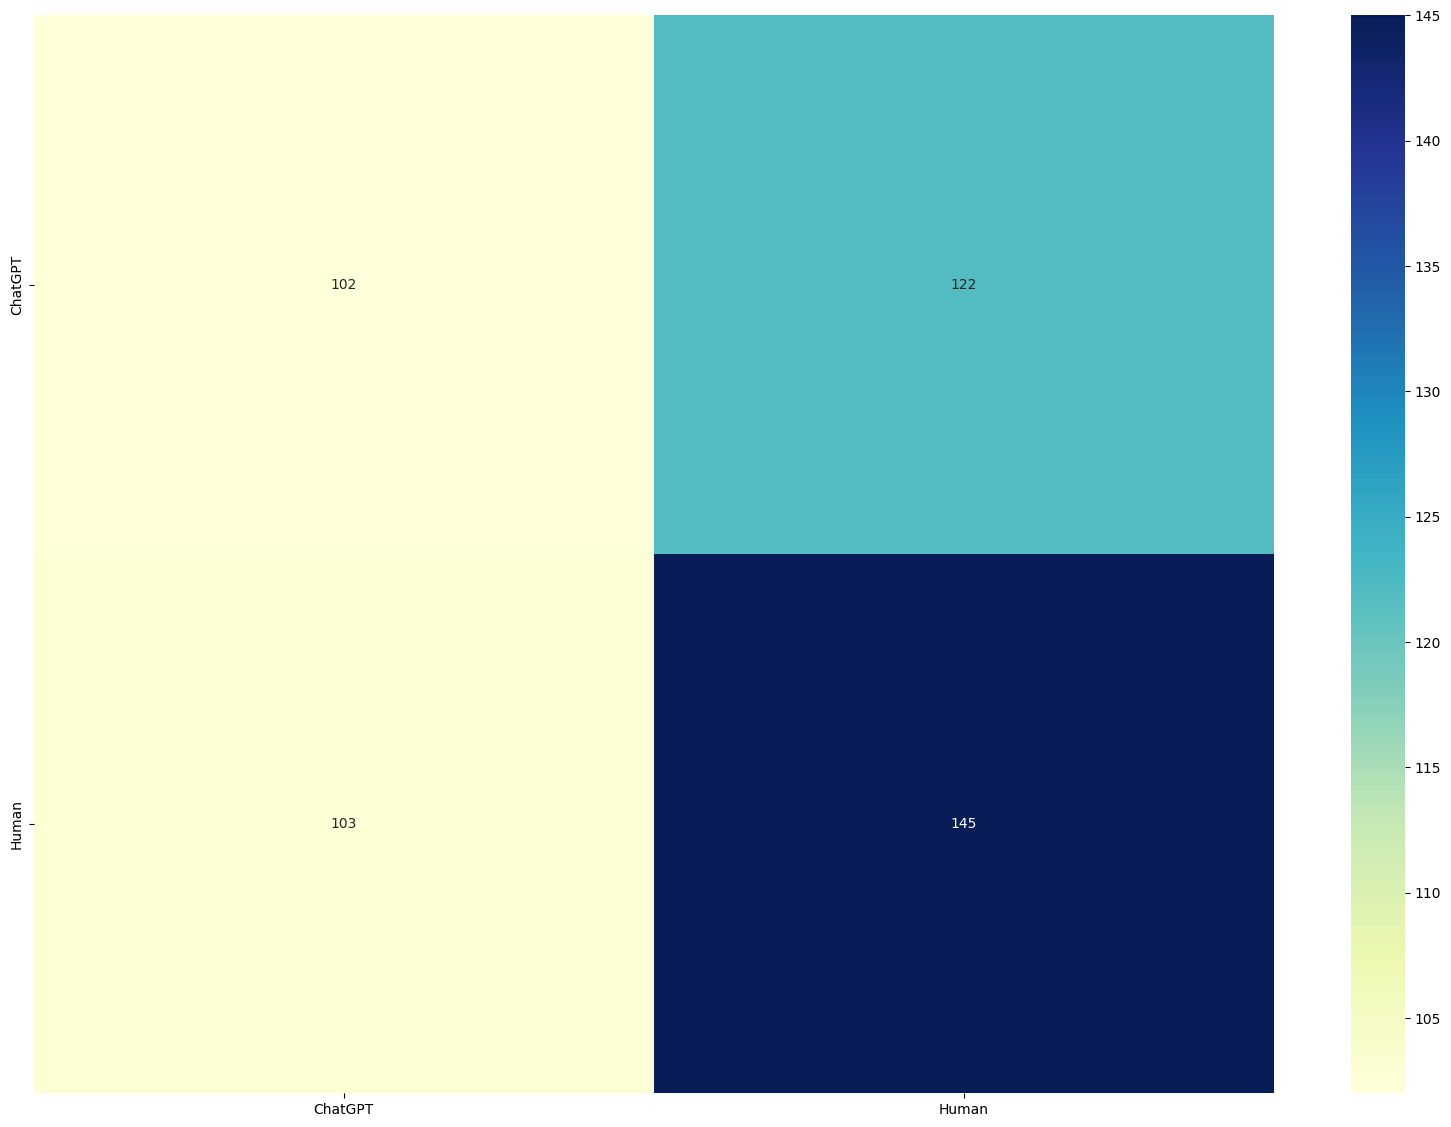

In [85]:
#select extra tree classifier as it provided best results
etc.fit(X_train_tfidf,y_train)
from sklearn.metrics import confusion_matrix
y_pred =etc.predict(X_test_tfidf)
cm = confusion_matrix(y_test, y_pred)
print(cm)

import seaborn as sn
import matplotlib.pyplot as plt
confusion_matrix = pd.DataFrame(cm, index = [i for i in ["ChatGPT","Human"]],
                  columns = [i for i in ["ChatGPT","Human"]])
plt.figure(figsize = (20,14))
sn.heatmap(confusion_matrix, annot=True,cmap="YlGnBu", fmt='g')

In [88]:
from sklearn import metrics


accuracy_score = metrics.accuracy_score(y_pred, y_test) * 100
precision_score = metrics.precision_score(y_pred, y_test, average='weighted') * 100
recall_score = metrics.recall_score(y_pred, y_test, average='weighted') * 100
f1_score = metrics.f1_score(y_pred, y_test, average='weighted') * 100

# Classification report provides precision, recall, f1-score, and support for each class
classification_report = metrics.classification_report(y_pred, y_test)

# To get the confusion matrix
confusion_mat = metrics.confusion_matrix(y_pred, y_test)

print(f"Accuracy: {accuracy_score:.2f}%")
print(f"Precision: {precision_score:.2f}%")
print(f"Recall: {recall_score:.2f}%")
print(f"F1 Score: {f1_score:.2f}%")
print("\nClassification Report:\n", classification_report)
print("\nConfusion Matrix:\n", confusion_mat)


Accuracy: 52.33%
Precision: 52.85%
Recall: 52.33%
F1 Score: 52.51%

Classification Report:
               precision    recall  f1-score   support

     chatgpt       0.46      0.50      0.48       205
       human       0.58      0.54      0.56       267

    accuracy                           0.52       472
   macro avg       0.52      0.52      0.52       472
weighted avg       0.53      0.52      0.53       472


Confusion Matrix:
 [[102 103]
 [122 145]]


Metrics Overview:

Accuracy (52.33%):

- This metric tells us that out of all the predictions the model made, 52.33% of them were correct. In the context of the data, it means that a little over half of the time the model correctly identified whether a message was from ChatGPT or a human.
Precision (52.85%):

Precision is the proportion of positive identifications that were actually correct. In this case, when the model thinks a message is from a human, it's correct 52.85% of the time.
Recall (52.33%):

Recall represents the proportion of actual positives that were identified correctly. This suggests that the model correctly identified 52.33% of all actual human messages.

F1 Score (52.51%):

- The F1 score is the harmonic mean of precision and recall, giving a balanced measure when both false positives and false negatives have equal importance. An F1 score of 52.51% indicates that the model has a moderate ability to balance precision and recall, leaning slightly towards precision.
Classification Report:
ChatGPT:

Precision (0.46):
- Out of all the messages the model thought were from ChatGPT, 46% of them actually were from ChatGPT.

Recall (0.50):
- The model was able to correctly identify 50% of all actual ChatGPT messages.

F1 Score (0.48):
- This score suggests that when predicting ChatGPT messages, the model has a roughly equal trade-off between precision and recall, but both metrics are below 50%.
Human:

Precision (0.58):
- Out of all the messages the model classified as human-written, 58% of them were actually from humans.
Recall (0.54):
- The model correctly identified 54% of all the actual human messages.
F1 Score (0.56):
- This suggests a slightly better balance between precision and recall for human messages compared to ChatGPT messages.
Confusion Matrix:

True Positives (102):
- 102 ChatGPT messages were correctly identified.
False Positives (103):
- 103 human messages were incorrectly labeled as ChatGPT.
False Negatives (122):  
- 122 ChatGPT messages were incorrectly labeled as human.
True Negatives (145):
- 145 human messages were correctly identified.

The model has a roughly balanced performance, but it's making errors for both classes almost equally. The results suggest that the model might need more fine-tuning or additional features to better distinguish between ChatGPT and human messages. The model performs slightly better when classifying human messages compared to ChatGPT messages.






Random forest model


In [ ]:
import pandas as pd
# Download the file from Google Drive
url = 'your directory here'
output = 'chats_file.csv'
gdown.download(url, output, quiet=False)

# Load data
data = pd.read_csv('chats_file.csv')


In [90]:
import nltk
nltk.download('punkt')
import nltk
nltk.download('omw-1.4')
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Tokenization
    tokens = nltk.word_tokenize(text.lower())

    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalnum() and token not in stop_words]

    return ' '.join(tokens)

data['Message'] = data['Message'].apply(preprocess_text)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data['Message'],
    data['Sender'],
    test_size=0.2,
    random_state=42
)
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_tfidf, y_train)
from sklearn.metrics import classification_report, accuracy_score

y_pred = clf.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Accuracy: 0.5211864406779662

Classification Report:
               precision    recall  f1-score   support

   assistant       0.52      0.41      0.46       350
        user       0.52      0.63      0.57       358

    accuracy                           0.52       708
   macro avg       0.52      0.52      0.51       708
weighted avg       0.52      0.52      0.51       708



Overall Accuracy:

My model's overall accuracy is about 52.12%. This means that it correctly predicted the class for a bit more than half of the test dataset. This level of accuracy suggests there's room for improvement since it's just slightly better than random guessing for two classes.

Precision, Recall, and F1-Score:

For the "assistant" class:

- Precision: Approximately 52%. Out of all the instances my model predicted as "assistant", about 52% of them were actually "assistant".
- Recall: Approximately 41%. Out of all the actual "assistant" instances in the test set, my model correctly identified about 41% of them.
- F1-Score: Approximately 46%. This score is the harmonic mean of precision and recall and gives a singular metric that balances the two. A value of 46% suggests there's quite a bit of room for improvement in balancing precision and recall for this class.

For the "user" class:

- Precision: Approximately 52%. Out of all the instances my model predicted as "user", about 52% of them were indeed "user".
- Recall: Approximately 63%. This means my model identified about 63% of all actual "user" instances correctly.
- F1-Score: Approximately 57%. The F1-score for the "user" class is better than that for the "assistant" class, suggesting that the model might be somewhat more reliable when predicting the "user" class.

Macro Average vs. Weighted Average:

- Macro Average: It averages the unweighted mean per label, suggesting both classes are equally important regardless of their number of instances.
- Weighted Average: It considers the number of true instances for each label, accounting for label imbalance.
Both the macro and weighted averages are around 52%, aligning with the overall accuracy. The similarity between the macro and weighted averages indicates that the dataset might be relatively balanced between the two classes.

Conclusion
In summary, while the Random Forest Classifier model showed a moderate ability to distinguish between the "assistant" and "user" classes, there's certainly room for improvement. The model seems to be slightly better at predicting the "user" class compared to the "assistant" class, based on the F1-scores. To enhance the model's performance, I might consider gathering more data, tweaking hyperparameters, or trying different feature engineering techniques.

Logistic regression model


Accuracy: 0.4788135593220339

Classification Report:
               precision    recall  f1-score   support

   assistant       0.47      0.42      0.45       350
        user       0.49      0.53      0.51       358

    accuracy                           0.48       708
   macro avg       0.48      0.48      0.48       708
weighted avg       0.48      0.48      0.48       708



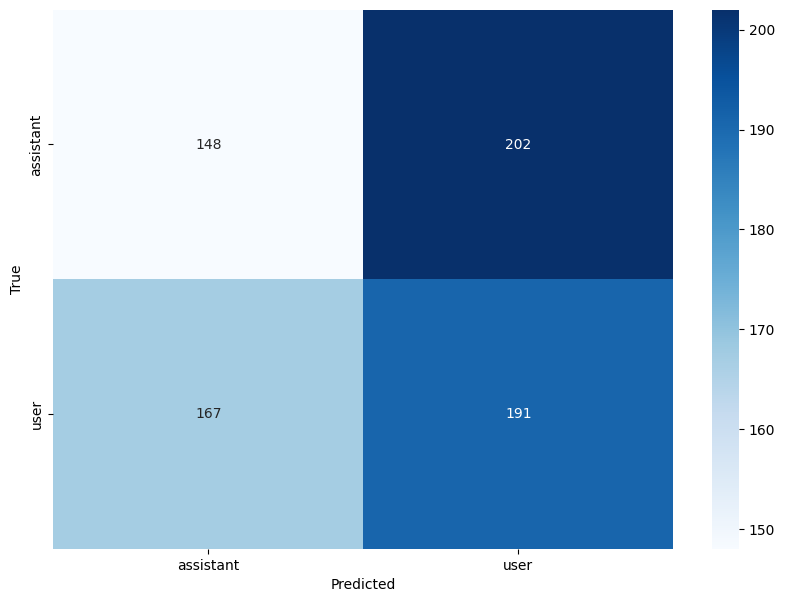

In [93]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Convert the text data into numerical vectors
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Create and train the logistic regression model
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train_vectorized, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test_vectorized)

# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g', xticklabels= logreg.classes_, yticklabels= logreg.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


The model's overall accuracy is approximately 47.88%. This means that out of every 100 predictions it makes on the test set, it gets about 48 of them correct. In many contexts, an accuracy rate of less than 50% is considered poor and not much better than random guessing. However, the suitability of this accuracy depends on the problem domain and the baseline accuracy we'd expect without a model.

Assistant Class:

- Precision: About 47%. This means that of all the instances the model predicted as "assistant", 47% were correctly identified.
- Recall: Roughly 42%. This indicates that out of all the actual "assistant" instances in the test set, the model was able to identify 42% of them correctly.
- F1-score: Around 45%. The F1-score is the harmonic mean of precision and recall and provides a single metric that balances the two. The closer this score is to 1 (or 100%), the better. A score of 45% suggests there's room for improvement.

User Class:

- Precision: Nearly 49%. This means that of all the instances the model labeled as "user", 49% were indeed "user".
- Recall: Approximately 53%. This means the model successfully identified 53% of all actual "user" instances in the test set.
- F1-score: About 51%. Again, the F1-score provides a balance between precision and recall. An F1-score of 51% for the "user" class suggests a performance slightly better than that of the "assistant" class but still offers room for improvement.

Macro Avg vs. Weighted Avg:

- The macro average calculates the metric independently for each class and then takes the average (hence treating all classes equally). Here, both precision and recall have a macro average of 48%.
- The weighted average calculates metrics based on the number of true instances for each label. It gives importance to the class with more instances (hence potentially highlighting the performance on more frequent labels). Here, the weighted average is also 48% for precision and recall.

Conclusion
From this analysis, I observe that the logistic regression model's performance is similar for both "assistant" and "user" classes, with slight variations. The accuracy, precision, recall, and F1-score values all hover around the 47-53% range, which is not particularly high. Depending on the application and the context, I might want to consider methods to improve the model or explore alternative models to achieve better performance.






**Discussion**

Neural Network model: During its learning phase, this model showed a significant difference between its performance on the data it was trained on and the data it hadn't seen before (known as validation data). This suggests that while it learned the training data really well (almost perfectly, in fact), it struggled to generalize this learning to new data. By the end of its training, it got about half of its predictions right, with a final test accuracy of 52.5%.

Extra Tree Classifier model: This model got 52.33% of its predictions correct. When we break down its performance, it was slightly better at identifying 'human' messages than 'ChatGPT' messages. The numbers 102 and 103 in the confusion matrix tell us it correctly identified 102 'chatgpt' messages but wrongly classified 103 of them. Similarly, it got 145 'human' messages right but missed 122.

Random Forest model: This model had an accuracy of about 52.12%. It was slightly better at recognizing 'user' messages than 'assistant' ones. However, it's worth noting that it got a significant chunk of both categories wrong, making it comparable to the Extra Tree Classifier.

Logistic Regression model: This was the least accurate model, getting only about 47.88% of its predictions correct. But, its mistakes were pretty balanced between the two message types ('assistant' and 'user').


**Summary**

My Steps & Pipeline:
1. Data Collection & Preprocessing:
I started by downloading a dataset that seemed to contain chat messages from both humans and ChatGPT. Before even thinking about training models, I had to clean up and process this data. This usually meant breaking down text into words or "tokens", and making sure the data was in a format that the models could understand.

2. Model Selection:
I tried out four different models:

- Neural Network

- Extra Tree Classifier

- Random Forest

- Logistic Regression

Each of these models works in its own unique way, but all were trained to do the same job: figure out if a chat message was written by a human or ChatGPT.

3.Training & Validation:
I trained each model on a portion of the data and then tested it on a different portion.

4.Evaluation:
After "quizzing" the models, I checked their "scores". I primarily looked at accuracy (how many they got right) and F1-score (a balance of how many true positives versus false positives). Most models had an accuracy around 51-52%, and an F1-score of about 50%. This means they were doing a bit better than just randomly guessing but weren't perfect.

Key Insights & Shortcomings:
All models performed similarly, with none standing out as significantly better. It's clear that there's room for improvement.
One possible reason might be that the ChatGPT-generated messages are very human-like, making the distinction challenging. Alternatively, there could be overlapping styles and content between the two categories.

Future improvements:

Better Data Preprocessing: Perhaps more advanced techniques of cleaning and preparing the data might make it easier for the models to learn.

More Complex Models: The neural network model could be expanded with more layers or nodes, potentially improving its learning capacity.

Feature Engineering: Extracting more features or information from the text data might help. For instance, looking at the length of messages, punctuation usage, or even the time it took to generate a message could be useful.

Ensemble Techniques: Instead of relying on one model, combining the predictions of all four might yield better results.

Additional Data: More data always helps! Especially if I can get more varied examples that clearly differentiate between human and ChatGPT messages.


**Summary of all models' performances**

| Model                 | Accuracy | Precision | Recall  | F1 Score |
|-----------------------|----------|-----------|---------|----------|
| Neural Network        | 52.50%   | 46.25%    | 47.48   | 45.97%        |
| Extra Tree Classifier | 52.33%   | 52.85%    | 52.33%  | 52.51%   |
| Random Forest         | 52.12%   | 52% (avg) | 52% (avg)| 51% (avg)|
| Logistic Regression   | 47.88%   | 48% (avg) | 48% (avg)| 48% (avg)|


**References**

Li, S. (2019, February 27). Building a logistic regression in Python, step by step. Medium. https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

Prosise, J. (2023, June 6). Text classification with Neural Networks. Atmosera. https://www.atmosera.com/blog/text-classification-with-neural-networks/

R, S. E. (2023, July 5). Understand random forest algorithms with examples (updated 2023). Analytics Vidhya. https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/

GeeksforGeeks. (2023, May 18). ML: Extra tree classifier for feature selection. GeeksforGeeks. https://www.geeksforgeeks.org/ml-extra-tree-classifier-for-feature-selection/  